# **The MNIST dataset is often being referred to as the "Hello World!" of Machine Learning**

**In this kernel I have demonstrated how to step by step design a model to tackle the MNIST challenge**

A special regard to Francis Chollet (Author of Keras) for writing an amazing book, "Deep Learning with Python".

Let us begin!

I have used the following techniques which will get you a step by step increment on the test set accuracy

**1. Random Forest Algorithm (93.5% on the Test set)**

> A limited parameter (max_depth = 20) ensemble of only 20 Decision Trees (default value is 100) which prevents overfitting and provides satisfactory accuracy on the validation set (around 95%) 

**2. A Simple Convolutional Neural Network (98.5% on the Test set)**

> A simple CNN with minimal parameters. No advanced techniques like Batch Normalization, Learning Rate Annealer, or Data Augmentation. The validation accuracy will be around 99.1% (see previous versions of the kernel)

**3. CNN with Data Augmentation (99.35% on the Test set)**

> Apply Data Augmentation on the CNN along with learning rate annealer and Nadam optimizer. The validation accuracy will be around 99.48% at 20 epochs

**4. An ensemble of CNNs (99.67% on the Test set)**

> Combine 7 previously designed CNNs to work on random shuffled subsets of training and validation data. The ensemble technique used is Bagging. The validation accuracy achieved is 99.55%. To touch the test set accuracy mark of 99.7% you just have to increase the number of CNNs in the ensemble

**5. We can use some regularization techniques to achieve 99.7% which seems to be accepted limit for the competition**

> Increase the number of CNNs in the ensemble to 10 and apply regularization techniques to achive 99.7%. One can also aggregate the predictions of 5 different CNN architectures instead of using multiple same CNN implementations.

**6. We have used multiple ML and DL algorithms & techniques to continuously increase our test set accuracy. Some more architectures can be experimented with, to touch the golden mark of 99.7%. But the problem is you still would not win the competition. Because some kagglers have been cheating to get a perfect test score of 100%.**

**I first read about this in Aurelion Geron's book "Hands on ML". The book mentions this article to elaborate on how someone can achive a perfect 100% accuracy on the test set. **

https://www.kaggle.com/c/digit-recognizer/discussion/61480

> **So let us cheat and hit the bullseye**
> **How? **
> **Train a model on the entire MNIST dataset (70K images) and then use it to make predictions**
> 
> **A lot of notebooks use an ensemble CNN or simple CNN with the full MNIST dataset for a perfect score.**
> 
> **But wait! If cheating is what you want to do, maybe do it the smart way. Simply use a Decision Tree Algorithm with (max_depth = None). It is in the nature of Decision Trees to overfit the training data.**

In [1]:
# Importing the libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
# Importing the training dataset

dataset = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Inspecting the dataset

dataset.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
# Checking for missing values

np.any(dataset.isnull().sum())

False

In [5]:
# Slicing the dataset to separate feature matrix 'X' and the vector of predictions 'y'

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

X.shape, y.shape, X.dtype, y.dtype

((42000, 784), (42000,), dtype('int64'), dtype('int64'))

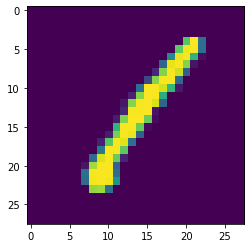

In [6]:
# Visualizing the dataset by reshaping an image into the original format i.e. 28 * 28

first_image = X[0]
first_image = first_image.reshape((28, 28))

plt.imshow(first_image)
plt.show()

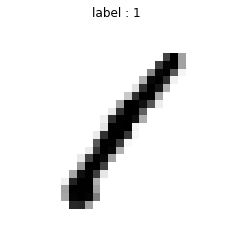

In [7]:
# Grayscaling the image, dropping the axis and printing the label

plt.imshow(first_image, "binary")
plt.title('label : {}'.format(y[0]))
plt.axis('off')
plt.show()

Random Indexes :  [26952 29899 16989 41600 41524   947 36864 41305 10630 30225  2820 18968
 17025 17984  3510 39549 35483 31528 16777 24976 31831 28834 10583 28806
 32467]

 Shape :  (25, 784)


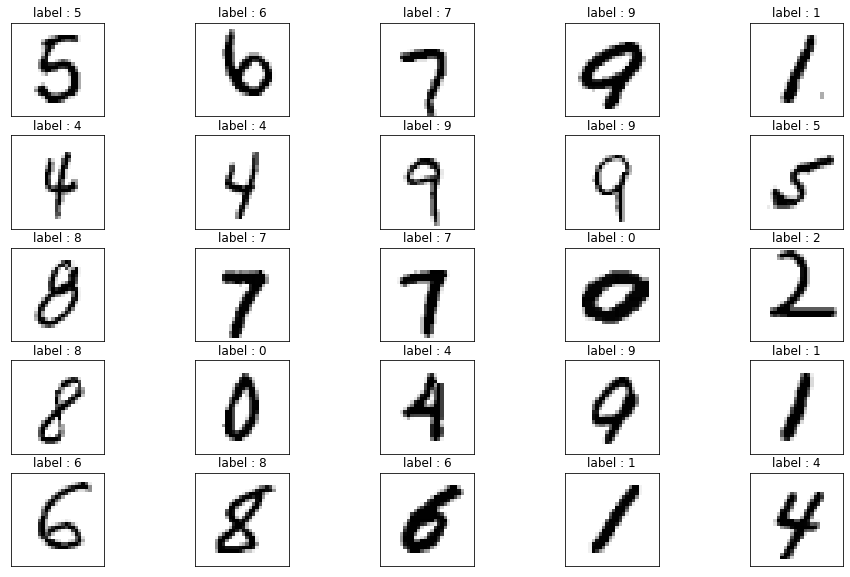

In [8]:
# Plotting multiple randomly chosen images from the dataset for insights

random_indexes = np.random.choice(range(len(X)), 25)
print("Random Indexes : ", random_indexes)

X_random = X[random_indexes]
y_random = y[random_indexes]

print("\n Shape : ", X_random.shape)

plt.figure(figsize = (16, 10))
for i in range(25):
    image = X_random[i]
    image = image.reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, "binary")
    plt.title('label : {}'.format(y_random[i]))
plt.show()

**PCA is a popular dimensionality reduction technique which will significantly bring down the dimensions from 784 to 154 preserving around 95% variance. The technique is demonstrated but not used in the final results.**

In [9]:
# Applying PCA to reduce dimensionality

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [10]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(42000, 154)

In [11]:
# Applying T-SNE Algorithm to check arrangements in the dataset

m = 5000
idx = np.random.permutation(len(X))[:m]

X_tsne = X[idx]
y_tsne = y[idx]

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
X_2d = tsne.fit_transform(X_tsne)

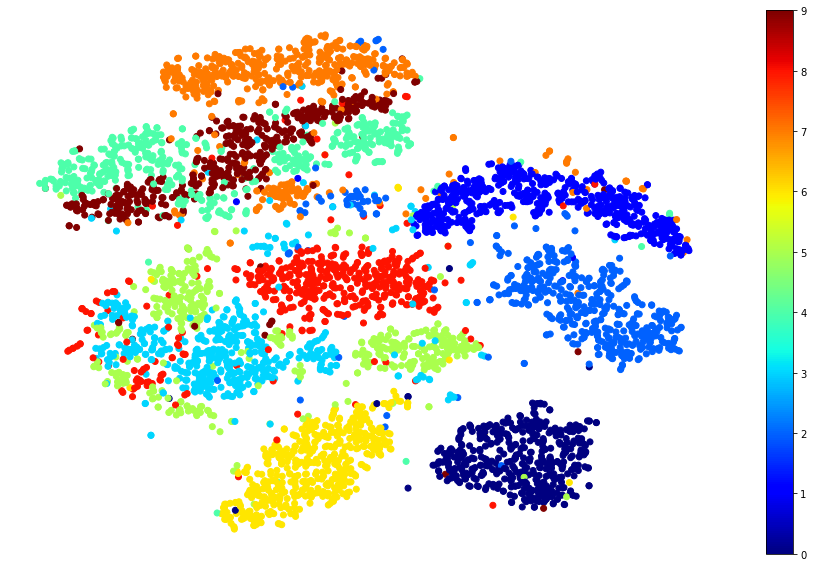

In [12]:
plt.figure(figsize = (16, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c = y_tsne, cmap = 'jet')
plt.axis('off')
plt.colorbar()
plt.show()

In [13]:
# Applying feature scaling for faster convergence

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'saga', tol = 0.1, penalty = 'l1')
log_reg.fit(X, y)

%time log_reg.score(X, y)

CPU times: user 243 ms, sys: 4.01 ms, total: 247 ms
Wall time: 135 ms


0.8882619047619048

In [15]:
# Applying Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X, y)

%time naive_bayes.score(X, y)

CPU times: user 1.2 s, sys: 931 ms, total: 2.13 s
Wall time: 2.13 s


0.5316904761904762

In [16]:
# Applying Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X, y)

%time dtf.score(X, y)

CPU times: user 71.9 ms, sys: 25 ms, total: 96.9 ms
Wall time: 97 ms


1.0

In [17]:
# Using Cross Validation with Decision Tree to avoid overfitting

from sklearn.model_selection import cross_val_score
cross_val_score(dtf, X, y, cv = 5)

array([0.85583333, 0.8525    , 0.85654762, 0.85166667, 0.85666667])

In [18]:
# Applying Ensemble techniques using a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, max_depth = 20)
rf.fit(X, y)

%time rf.score(X, y)

CPU times: user 341 ms, sys: 24 ms, total: 365 ms
Wall time: 365 ms


0.9993809523809524

In [19]:
# Applying Cross Validation on the Random Forest estimator to avoid overfitting

cross_val_score(rf, X, y, cv = 5)

array([0.94869048, 0.95285714, 0.95071429, 0.95333333, 0.95559524])

In [20]:
# Applying Ensemble techniques using a Random Forest Classifier on the Reduced Dataset

from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 20, max_depth = 20)
rf1.fit(X_reduced, y)

%time rf1.score(X_reduced, y)

CPU times: user 211 ms, sys: 0 ns, total: 211 ms
Wall time: 211 ms


0.9998095238095238

In [21]:
# Applying Cross Validation on the Random Forest estimator to avoid overfitting

cross_val_score(rf1, X_reduced, y, cv = 5)

array([0.91107143, 0.91345238, 0.90785714, 0.90845238, 0.91880952])

In [22]:
# Generating predictions on the training set

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rf, X, y, cv = 5)
y_pred

array([1, 0, 1, ..., 7, 6, 9])

In [23]:
# Checking the Precision, Recall, F1 Score and plotting the confusion matrix

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

print('Accuracy : ', accuracy_score(y, y_pred))
print('\nPrecision : ', precision_score(y, y_pred, average = "micro"))
print('\nRecall : ', recall_score(y, y_pred, average = "micro"))
print('\nF1 Score : ', f1_score(y, y_pred, average = "micro"))
print('\nConfusion Matrix \n\n', confusion_matrix(y, y_pred))

Accuracy :  0.9527857142857142

Precision :  0.9527857142857142

Recall :  0.9527857142857142

F1 Score :  0.9527857142857142

Confusion Matrix 

 [[4061    0   10    3    6    7   14    2   25    4]
 [   1 4604   21   15    7    7    8    9    9    3]
 [  20   10 3986   23   25   12   19   43   31    8]
 [  13    6   91 4040    7   75    5   28   57   29]
 [   7   10   10    3 3897    2   21    8   16   98]
 [  20    9    9   84   16 3562   39    5   31   20]
 [  30    7    6    1   10   29 4036    0   18    0]
 [   7   23   68   12   35    2    0 4175   13   66]
 [  14   26   35   70   32   56   22   12 3755   41]
 [  21    8   11   57   77   22    3   53   35 3901]]


In [24]:
# Accessing the test dataset

test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Importing the test set

X_test = test_data.values
X_test.shape

(28000, 784)

In [26]:
# Scaling the test set

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# Generating the predictions on the test set

predictions = rf.predict(X_test_scaled)
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [28]:
# Saving the predictions in a dataframe

pred_df = pd.DataFrame(columns = ['ImageId', 'Label'])
pred_df['ImageId'] = np.arange(1, 28001)
pred_df['Label'] = predictions
pred_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [29]:
# Writing the predictions in a csv file

pred_df.to_csv('ml_submission.csv', index = False)

The ML Algorithm will reach around 94% accuracy on the test set which is a good milestone to start
Now we will apply a Convolutional Neural Network (CNN) to increase the validation accuracy and perform 
even better on the test set

In [30]:
# Splitting the dataset into training set and validation set

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((37800, 784), (4200, 784), (37800,), (4200,))

In [31]:
# Reshaping the data for Image Generator (Rank = 4)

X_train = X_train.reshape((37800, 28, 28, 1))
X_valid = X_valid.reshape((4200, 28, 28, 1))
X_train.shape, X_valid.shape

((37800, 28, 28, 1), (4200, 28, 28, 1))

In [32]:
# Applying Data Augmentation

datagen = ImageDataGenerator(rotation_range=15,  zoom_range = 0.1,  width_shift_range=0.1,  height_shift_range=0.1)
datagen.fit(X_train)

In [33]:
# Defining the model architecture

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])

In [34]:
# Training the CNN

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=128),
                              epochs = 20, validation_data = (X_valid, y_valid))

Train for 296 steps, validate on 4200 samples
Epoch 1/20
296/296 [==============================] - 17s 57ms/step - loss: 0.5523 - accuracy: 0.8271 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 2/20
296/296 [==============================] - 11s 37ms/step - loss: 0.1891 - accuracy: 0.9444 - val_loss: 0.0462 - val_accuracy: 0.9848
Epoch 3/20
296/296 [==============================] - 11s 38ms/step - loss: 0.1314 - accuracy: 0.9606 - val_loss: 0.0339 - val_accuracy: 0.9895
Epoch 4/20
296/296 [==============================] - 11s 37ms/step - loss: 0.1079 - accuracy: 0.9681 - val_loss: 0.0301 - val_accuracy: 0.9921
Epoch 5/20
296/296 [==============================] - 11s 37ms/step - loss: 0.0929 - accuracy: 0.9721 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 6/20
296/296 [==============================] - 12s 40ms/step - loss: 0.0820 - accuracy: 0.9758 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 7/20
296/296 [==============================] - 11s 38ms/step - loss: 0.0766 - accur

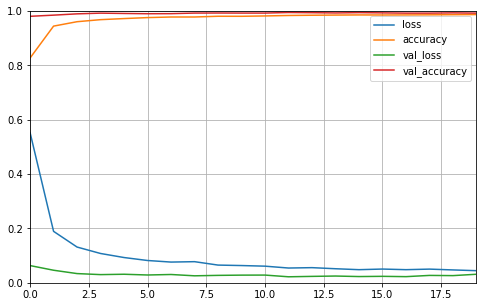

In [35]:
# Visualizing the convergence

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [36]:
# Generating predictions on the test set

X_test_scaled = X_test_scaled.reshape((28000, 28, 28, 1))
cnn_pred_aug = model.predict_classes(X_test_scaled)
cnn_pred_aug

array([2, 0, 9, ..., 3, 9, 2])

In [37]:
# Saving the predictions in a dataframe

pred_df_cnn = pd.DataFrame(columns = ['ImageId', 'Label'])
pred_df_cnn['ImageId'] = np.arange(1, 28001)
pred_df_cnn['Label'] = cnn_pred_aug
pred_df_cnn

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [38]:
# Writing the predictions in a csv file

pred_df_cnn.to_csv('dl_with_aug_submission.csv', index = False)

Ensemble CNN with Batch Normalization ( 7 CNNs used )

In [39]:
# An empty list to store the ensemble of 7 CNNs

model_list = []

In [40]:
# Learning rate annealer

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [41]:
# Creating 7 objects of the same CNN architecture and saving in model_list

for i in range(7):
    model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')])

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
    model_list.append(model)


In [42]:
# Verifying the hashcodes

model_list

In [43]:
# Reshaping to a tensor of rank 4

X = X.reshape((42000, 28, 28, 1))
X.shape

(42000, 28, 28, 1)

In [44]:
# Training all the 7 CNNs in the ensemble together

history = [0] * 7

for i in range(7):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)
    history[i] = model_list[i].fit_generator(datagen.flow(X_train, y_train, batch_size = 128), 
                                             epochs = 30, validation_data = (X_valid, y_valid), callbacks = [reduce_lr])
    print("CNN : {} Maximum Train Accuracy : {} Maximum Validation Accuracy : {}".format(i+1, max(history[i].history['accuracy']), max(history[i].history['val_accuracy'])))

Train for 296 steps, validate on 4200 samples
Epoch 1/30
296/296 [==============================] - 13s 44ms/step - loss: 0.5518 - accuracy: 0.8318 - val_loss: 0.2957 - val_accuracy: 0.9476
Epoch 2/30
296/296 [==============================] - 12s 41ms/step - loss: 0.1733 - accuracy: 0.9476 - val_loss: 0.0506 - val_accuracy: 0.9850
Epoch 3/30
296/296 [==============================] - 11s 37ms/step - loss: 0.1309 - accuracy: 0.9607 - val_loss: 0.0464 - val_accuracy: 0.9864
Epoch 4/30
296/296 [==============================] - 11s 37ms/step - loss: 0.1039 - accuracy: 0.9694 - val_loss: 0.0427 - val_accuracy: 0.9862
Epoch 5/30
296/296 [==============================] - 11s 38ms/step - loss: 0.0897 - accuracy: 0.9735 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 6/30
296/296 [==============================] - 11s 38ms/step - loss: 0.0811 - accuracy: 0.9767 - val_loss: 0.0369 - val_accuracy: 0.9902
Epoch 7/30
296/296 [==============================] - 12s 41ms/step - loss: 0.0676 - accur

In [45]:
# Creating a prediction tensor for applying the bagging technique

ensemble_cnn_pred = np.zeros((X_test.shape[0], 10))
ensemble_cnn_pred.shape

(28000, 10)

In [46]:
# Generating and aggregating predictions

for i in range(7):
  ensemble_cnn_pred = ensemble_cnn_pred + model_list[i].predict(X_test_scaled)

In [47]:
# Verifying the predictions of the ensemble

np.sum(ensemble_cnn_pred[0])

7.000000060268759

In [48]:
# Aggregating the predictions

ensemble_cnn_pred = np.argmax(ensemble_cnn_pred, axis = 1)
ensemble_cnn_pred[0]

2

In [49]:
# Verifying the shape

ensemble_cnn_pred.shape

(28000,)

In [50]:
# Saving the predictions in a dataframe

pred_df_ensemble_cnn = pd.DataFrame(columns = ['ImageId', 'Label'])
pred_df_ensemble_cnn['ImageId'] = np.arange(1, 28001)
pred_df_ensemble_cnn['Label'] = ensemble_cnn_pred
pred_df_ensemble_cnn

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [51]:
# Writing the predictions in a csv file

pred_df_ensemble_cnn.to_csv('ensemble_cnn_with_aug_submission.csv', index = False)

# Now let us cheat!
> 
> **Fetch the entire MNIST dataset from the openml portal.**
> **Train a Decision Tree Algorithm and allow it to overfit the entire MNIST dataset.**
> **Once trained, the Decision Tree Model will explicitly remember each and every instance by heart (one can also use graphviz to plot the actual visual tree created during training.)**

In [52]:
# fetching the entire MNIST dataset from openml

from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784', version=1)

In [53]:
# loading and preprocessing the dataset

mnist_X = dataset.data
mnist_y = dataset.target.astype(np.int32)
mnist_X, mnist_y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int32))

In [54]:
# Scaling and implementing the Decision Tree Algorithm

mnist_X = scaler.fit_transform(mnist_X)

dtf_cheat = DecisionTreeClassifier()
dtf_cheat.fit(mnist_X, mnist_y)
dtf_cheat.score(mnist_X, mnist_y)

1.0

In [55]:
mnist_test_set = X_test_scaled.reshape((28000, 784))

In [56]:
# Generating the predictions

cheat_pred = dtf_cheat.predict(mnist_test_set)
cheat_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int32)

In [57]:
# Saving the predictions in a dataframe

cheat_dt = pd.DataFrame(columns = ['ImageId', 'Label'])
cheat_dt['ImageId'] = np.arange(1, 28001)
cheat_dt['Label'] = cheat_pred
cheat_dt

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,2
...,...,...
27995,27996,4
27996,27997,2
27997,27998,3
27998,27999,9


In [58]:
# Writing the predictions in a csv file

cheat_dt.to_csv('cheat_solution_dt.csv', index = False)

> I sincerely hope you found something useful by reading this kernel!
> 
> Happy Kaggling!